# Machine Learning

### 인공신경망
- 인공신경망은 Python에서 Deep Learning으로 발전됨


In [4]:
print(head(iris))
tail(iris)

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.3,5.7,2.5,virginica
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica
150,5.9,3.0,5.1,1.8,virginica


In [6]:
# 학습용 데이터와 검증용 데이터의 분리

set.seed(1234)
samp<- c(sample(1:50,35), sample(51:100, 35) ,sample(101:150, 35))
samp


[1]  28  16  22  37  44   9   5  38  49   4  34  39  48  26   6  15  14  40
 [19]  30  24  32  41  29  21   8  20  31   3  50  46   2  35  47  42  12  53
 [37]  73  91  86  58  82  92  93  52  65  88  56  79  95  96  76  67  97  60
 [55]  98  72 100  59  66  90  80  87  99  75  63  85  69  68  89  62 120 141
 [73] 107 132 106 137 127 112 108 101 136 128 119 109 130 117 122 146 121 147
 [91] 113 135 102 133 126 139 131 116 111 104 103 124 110 144 129

In [7]:
# 학습용 데이터셋
data.tr <- iris[samp,]

In [8]:
# 검증용 데이터셋
data.test <- iris[-samp,]

In [10]:
summary(data.tr)
summary(data.test)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width         Species  
 Min.   :4.300   Min.   :2.200   Min.   :1.100   Min.   :0.10   setosa    :35  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.30   versicolor:35  
 Median :5.800   Median :3.000   Median :4.300   Median :1.30   virginica :35  
 Mean   :5.847   Mean   :3.042   Mean   :3.749   Mean   :1.19                  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.80                  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.50                  

  Sepal.Length    Sepal.Width     Petal.Length   Petal.Width          Species  
 Min.   :4.400   Min.   :2.000   Min.   :1.00   Min.   :0.100   setosa    :15  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.60   1st Qu.:0.300   versicolor:15  
 Median :5.800   Median :3.100   Median :4.70   Median :1.400   virginica :15  
 Mean   :5.836   Mean   :3.093   Mean   :3.78   Mean   :1.222                  
 3rd Qu.:6.500   3rd Qu.:3.400   3rd Qu.:5.10   3rd Qu.:1.900                  
 Max.   :7.700   Max.   :4.100   Max.   :6.70   Max.   :2.500                  

### 학습 시키기

In [127]:
# 인공 신경망 모델 사용
library(nnet) # 뉴럴 네트워크

In [171]:
# Model 만들기
model.nnet <- nnet(Species ~ ., data = data.tr , size = 100) 
# size : 은닉층 갯수 sample수보다 작아야 함. (Hyper Parameter)


# weights:  803
initial  value 267.444872 
iter  10 value 14.091942
iter  20 value 3.791829
iter  30 value 0.265748
iter  40 value 0.000725
final  value 0.000096 
converged


In [172]:
x <- subset(data.test, select = -Species)
y <- data.test$Species

In [173]:
# 검증 

pred <- predict(model,x, type = "class") # class : 분류된것(객관식),  raw : 주관식 
head(pred)

[1] "setosa" "setosa" "setosa" "setosa" "setosa" "setosa"

In [174]:
pred2 <- predict(model.nnet,x, type = "class")

In [175]:
# '정확도'

mean(pred == y)
mean(pred2 == y)
table(pred2,y)

[1] 0.9555556

[1] 0.9333333

            y
pred2        setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         13         1
  virginica       0          2        14

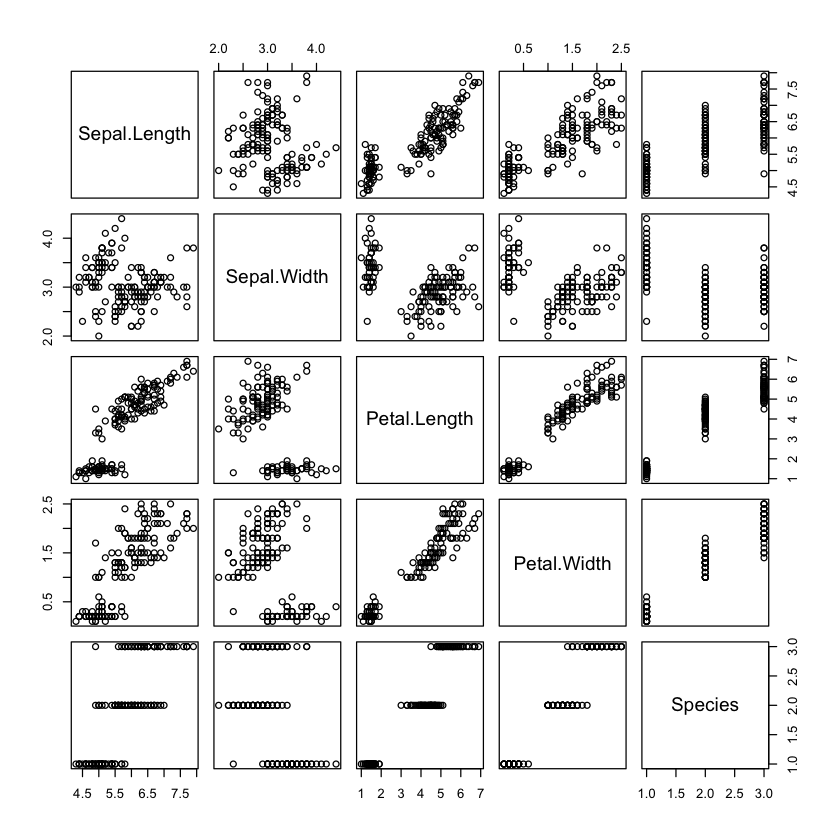

In [176]:
plot(iris)

In [134]:
# 정오표 확인

table(pred, y)

            y
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         13         0
  virginica       0          2        15

In [76]:
table(pred2,y)

            y
pred2        setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         13         1
  virginica       0          2        14

In [177]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


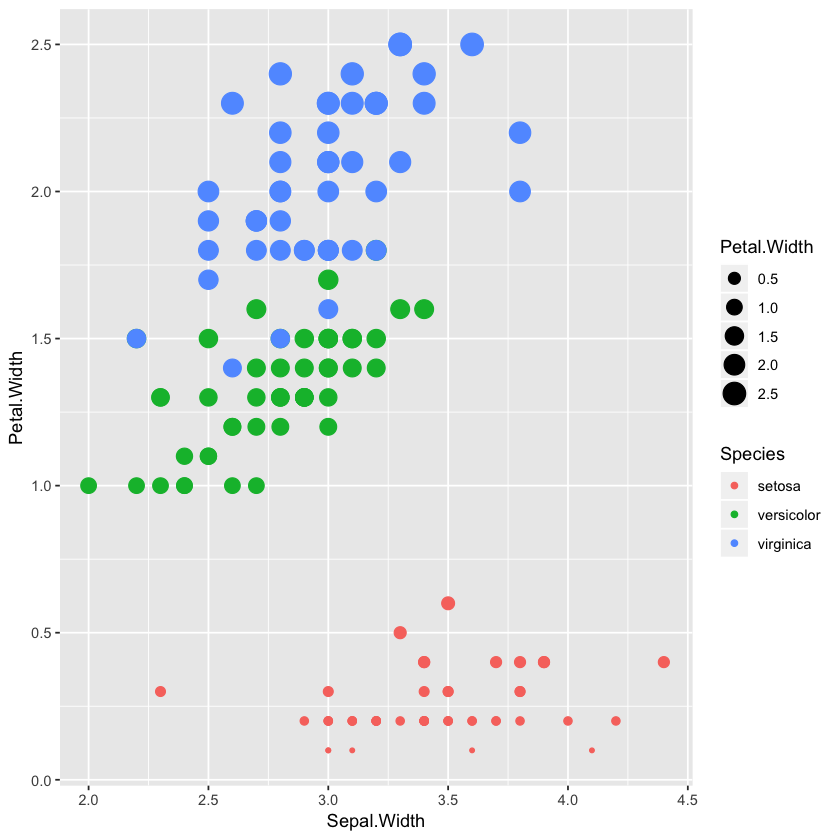

In [180]:
qplot(Sepal.Width, Petal.Width,data=iris , col = Species , size = Petal.Width)

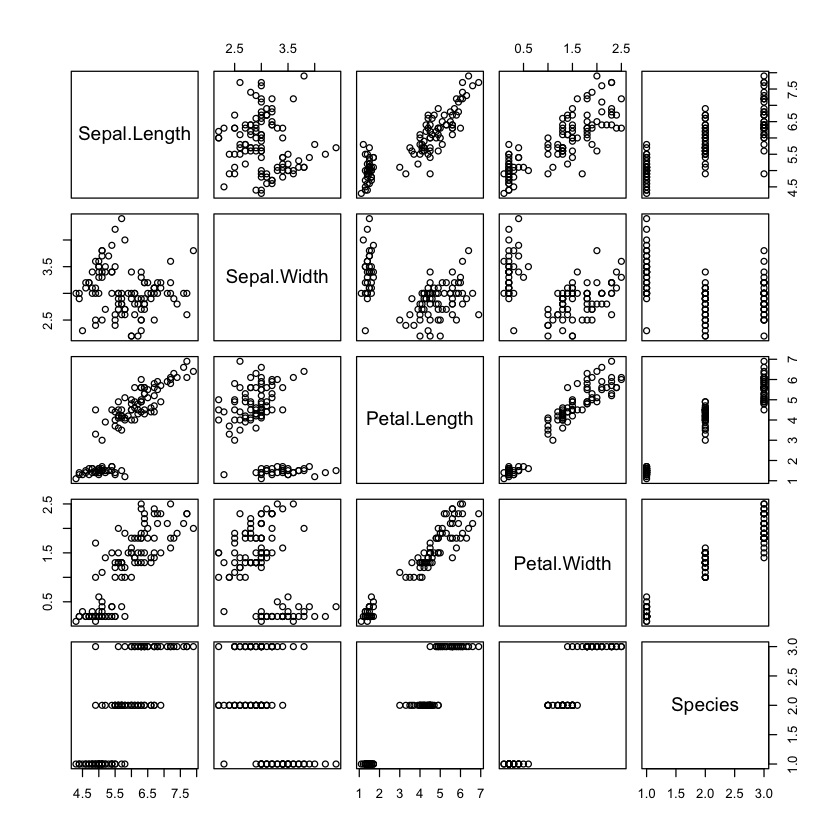

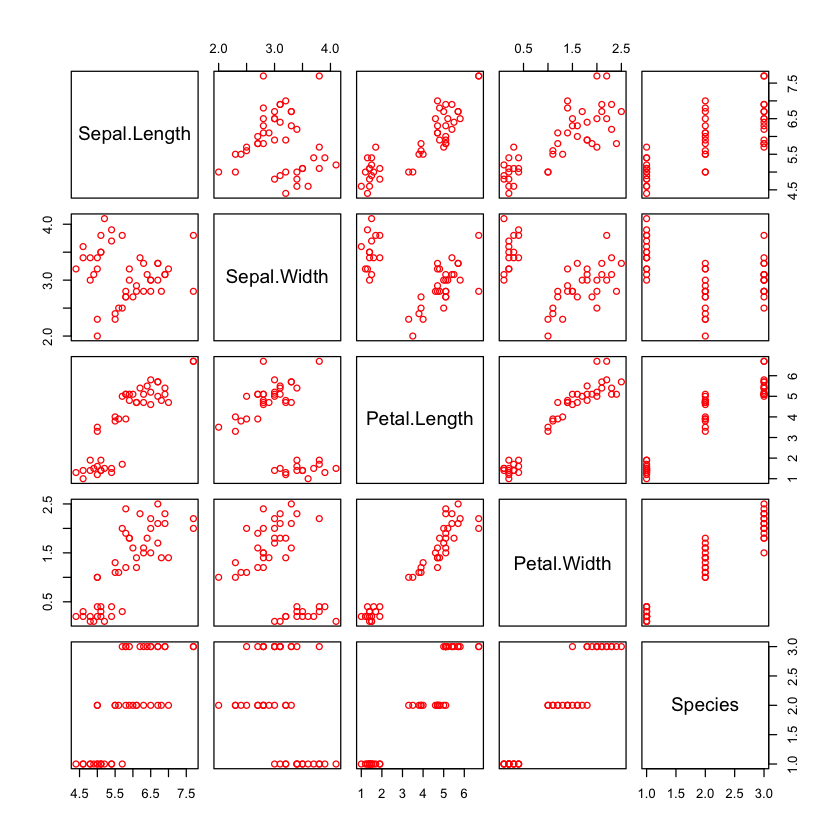

In [229]:

plot(data.tr)

plot(data.test, col = "red")

---
# 학습시킨 머신러닝 사용하기

In [181]:
# Sepal.Length = 5.3
# Sepal.Width = 3.3
# Petal.Length = 1.6
# Petal.Width = 0.3


- 현재 AI는 105개의 데이터로 공부한 모델임.
- Trainingrhk Test를 통해서 정확도가 입증 되었다면 전체 Dataset으로 AI를 구성하여 사용

In [213]:
# 사용가능하다고 판단되면 모든 데이터를 기준으로 학습
model.nnet <- nnet(Species ~ . , data = iris, size = 3)

# weights:  27
initial  value 210.030955 
iter  10 value 157.737485
iter  20 value 11.681006
iter  30 value 6.510672
iter  40 value 5.826775
iter  50 value 2.942219
iter  60 value 2.308879
iter  70 value 2.251855
iter  80 value 2.249341
final  value 2.249341 
converged


In [217]:
table(predict(model.nnet,data.test, type = "class"),y)

            y
             setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         0
  virginica       0          1        15

In [219]:
example1 <- list(Sepal.Length = 5.3 , Sepal.Width = 3.3 ,Petal.Length = 1.6 ,Petal.Width = 0.3)
# list는 데이터 프레임 1줄.

In [220]:
#Sepal.Length = 9.3
# Sepal.Width = 2.2
# Petal.Length = 7.5
# Petal.Width = 3.5

In [221]:
example2 <- list(Sepal.Length = 9.3 , Sepal.Width = 2.2 ,Petal.Length = 7.5 ,Petal.Width = 3.5)

In [222]:
predict(model.nnet,example1, type = "class")
predict(model.nnet,example2, type = "class")

[1] "setosa"

[1] "virginica"

In [223]:
summary(iris[51:100,])

  Sepal.Length    Sepal.Width     Petal.Length   Petal.Width          Species  
 Min.   :4.900   Min.   :2.000   Min.   :3.00   Min.   :1.000   setosa    : 0  
 1st Qu.:5.600   1st Qu.:2.525   1st Qu.:4.00   1st Qu.:1.200   versicolor:50  
 Median :5.900   Median :2.800   Median :4.35   Median :1.300   virginica : 0  
 Mean   :5.936   Mean   :2.770   Mean   :4.26   Mean   :1.326                  
 3rd Qu.:6.300   3rd Qu.:3.000   3rd Qu.:4.60   3rd Qu.:1.500                  
 Max.   :7.000   Max.   :3.400   Max.   :5.10   Max.   :1.800                  

In [226]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [225]:
cor(iris[,1:4])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000
